# Cleaning data
> Uses trained learner to help cleaning data

In [ ]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

In [ ]:
source = untar_data(URLs.MNIST_TINY)

In [ ]:
dblock = DataBlock((ImageBlock(PILImageBW), CategoryBlock), get_items=get_image_files,
                   splitter=GrandparentSplitter(),
                   get_y=parent_label,
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])

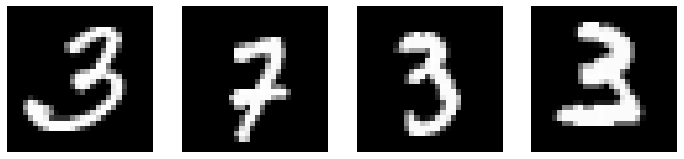

In [ ]:
dls = dblock.dataloaders(source)
dls.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy])
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.898660,0.303949,0.861230,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.365436,0.199608,0.939914,00:18


In [ ]:
ImageClassifierCleaner??

In [ ]:
learn.preds

AttributeError: 'Learner' object has no attribute 'preds'

In [ ]:
for o in learn.dls.valid: break

RuntimeError: DataLoader worker (pid 39785) is killed by signal: Unknown signal: 0. 

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

IndexError: list index out of range

In [ ]:
%debug

> /Users/lgvaz/git/fastai2/fastai2/torch_core.py(213)to_concat()
    211 def to_concat(xs, dim=0):
    212     "Concat the element in `xs` (recursively if they are tuples/lists of tensors)"
--> 213     if is_listy(xs[0]): return type(xs[0])([to_concat([x[i] for x in xs], dim=dim) for i in range_of(xs[0])])
    214     if isinstance(xs[0],dict):  return {k: to_concat([x[k] for x in xs], dim=dim) for k in xs[0].keys()}
    215     #We may receives xs that are not concatenatable (inputs of a text classifier for instance),

ipdb> u
> /Users/lgvaz/git/fastai2/fastai2/callback/core.py(94)after_validate()
     92     def after_validate(self):
     93         "Concatenate all recorded tensors"
---> 94         if self.with_input:     self.inputs  = detuplify(to_concat(self.inputs, dim=self.concat_dim))
     95         if not self.save_preds: self.preds   = detuplify(to_concat(self.preds, dim=self.concat_dim))
     96         if not self.save_targs: self.targets = detuplify(to_concat(self.target

In [ ]:
# cleaner.delete()

In [ ]:
# cleaner.change()